In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading dataset
master_data = pd.read_csv('mortality_dataset.csv')
master_data.head()

,subject_id,hadm_id,age,gender,ethnicity,admission_type,first_careunit,icu_los,hospital_expire_flag,heart_rate_mean,...,respiratory_rate,temperature_fahrenheit,height_cm,admission_weight_lbs,mixed_venous_o2_sat,o2_saturation_pulseoxymetry2,pH_arterial,pH_venous,pH_soft,pH_dipstick
0,10923761,28280980,62,M,UNKNOWN,EW EMER.,Surgical Intensive Care Unit (SICU),0.286389,1,90.625000,...,16.500000,NaN,NaN,NaN,98.0,88.000000,NaN,NaN,NaN,NaN
1,19838357,28262319,70,M,WHITE,EW EMER.,Trauma SICU (TSICU),0.134028,0,86.062500,...,20.625000,98.0,NaN,NaN,NaN,95.625000,NaN,NaN,NaN,NaN
2,12744670,29633062,26,F,ASIAN,EW EMER.,Trauma SICU (TSICU),0.125521,0,79.000000,...,26.000000,98.6,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,NaN
3,14877188,22811307,76,M,HISPANIC/LATINO - DOMINICAN,EW EMER.,Coronary Care Unit (CCU),0.211748,1,96.000000,...,20.500000,NaN,NaN,242.0,NaN,NaN,NaN,NaN,NaN,NaN
4,10050755,20050796,77,M,WHITE - RUSSIAN,OBSERVATION ADMIT,Medical/Surgical Intensive Care Unit (MICU/SICU),0.142164,1,87.333333,...,35.666667,NaN,NaN,NaN,NaN,64.333333,NaN,NaN,NaN,NaN


In [3]:
# information about the dataset
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73181 entries, 0 to 73180
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subject_id                             73181 non-null  int64  
 1   hadm_id                                73181 non-null  int64  
 2   age                                    73181 non-null  int64  
 3   gender                                 73181 non-null  object 
 4   ethnicity                              73181 non-null  object 
 5   admission_type                         73181 non-null  object 
 6   first_careunit                         73181 non-null  object 
 7   icu_los                                73181 non-null  float64
 8   hospital_expire_flag                   73181 non-null  int64  
 9   heart_rate_mean                        73179 non-null  float64
 10  gcs_eye_opening                        73014 non-null  float64
 11  gc

In [4]:
# Calculating Null's in each column
master_data.isnull().sum()

subject_id                                   0
hadm_id                                      0
age                                          0
gender                                       0
ethnicity                                    0
admission_type                               0
first_careunit                               0
icu_los                                      0
hospital_expire_flag                         0
heart_rate_mean                              2
gcs_eye_opening                            167
gcs_verbal_response                        174
gcs_motor_response                         182
non_invasive_blood_pressure_diastolic      695
non_invasive_blood_pressure_mean           696
respiratory_rate                            56
temperature_fahrenheit                     883
height_cm                                34883
admission_weight_lbs                     11814
mixed_venous_o2_sat                      64891
o2_saturation_pulseoxymetry2                60
pH_arterial  

<Axes: >

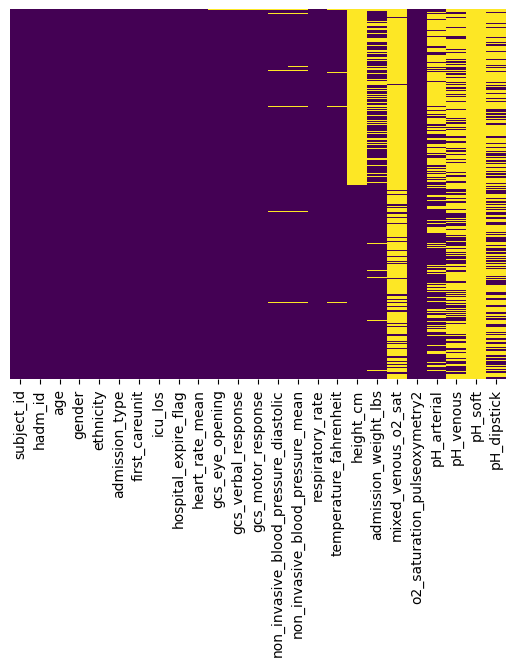

In [5]:
sns.heatmap(master_data.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [6]:
# calculating fill rate of each column
fill_rates = master_data.count() / len(master_data) * 100
fill_rates

subject_id                               100.000000
hadm_id                                  100.000000
age                                      100.000000
gender                                   100.000000
ethnicity                                100.000000
admission_type                           100.000000
first_careunit                           100.000000
icu_los                                  100.000000
hospital_expire_flag                     100.000000
heart_rate_mean                           99.997267
gcs_eye_opening                           99.771799
gcs_verbal_response                       99.762233
gcs_motor_response                        99.751302
non_invasive_blood_pressure_diastolic     99.050300
non_invasive_blood_pressure_mean          99.048933
respiratory_rate                          99.923477
temperature_fahrenheit                    98.793403
height_cm                                 52.333256
admission_weight_lbs                      83.856465
mixed_venous

In [7]:
## dropping columns where fill rate is < 50%
data = master_data.copy()
data.drop(['pH_soft','pH_arterial','pH_venous','mixed_venous_o2_sat'],axis = 1, inplace = True)

In [8]:
# Define condition
condition_1 = data['non_invasive_blood_pressure_diastolic'] > 200
condition_2 = data['non_invasive_blood_pressure_mean'] > 200

# Replace values in 'non_invasive_blood_pressure_diastolic' column based on the condition
data.loc[condition_1, 'non_invasive_blood_pressure_diastolic'] = data.loc[condition_1, 'non_invasive_blood_pressure_mean']
data.loc[condition_2, 'non_invasive_blood_pressure_mean'] = data.loc[condition_1, 'non_invasive_blood_pressure_diastolic']

In [9]:
data = data[(data['heart_rate_mean'] >= 0) & (data['heart_rate_mean'] <= 300)]
data = data[(data['respiratory_rate'] >= 0) & (data['respiratory_rate'] <= 100)]
data = data[(data['temperature_fahrenheit'] >= 0) & (data['temperature_fahrenheit'] <= 250)]
data = data[(data['admission_weight_lbs'] >= 0) & (data['admission_weight_lbs'] <= 1000)]
data = data[(data['o2_saturation_pulseoxymetry2'] >= 0) & (data['o2_saturation_pulseoxymetry2'] <= 100)]
data = data[(data['height_cm'] >= 0) & (data['height_cm'] <= 300)]

In [10]:
data.describe()

,subject_id,hadm_id,age,icu_los,hospital_expire_flag,heart_rate_mean,gcs_eye_opening,gcs_verbal_response,gcs_motor_response,non_invasive_blood_pressure_diastolic,non_invasive_blood_pressure_mean,respiratory_rate,temperature_fahrenheit,height_cm,admission_weight_lbs,o2_saturation_pulseoxymetry2,pH_dipstick
count,3.622500e+04,3.622500e+04,36225.000000,36225.000000,36225.000000,36225.000000,36213.000000,36214.000000,36211.000000,35944.000000,35933.000000,36225.000000,36225.000000,36225.000000,36225.000000,36225.000000,16729.000000
mean,1.498819e+07,2.498381e+07,63.649551,4.690119,0.127205,84.987307,3.418187,3.595630,5.384159,64.196082,77.271620,19.393222,98.300008,168.718732,181.287422,96.705947,5.914610
std,2.887167e+06,2.883137e+06,15.798175,6.295541,0.333207,13.309964,0.621394,1.310526,0.896784,10.735071,10.462432,3.328219,2.102330,14.146132,52.761545,1.930731,0.685662
min,1.000003e+07,2.000015e+07,18.000000,0.001447,0.000000,28.727273,1.000000,1.000000,1.000000,18.000000,24.666667,8.395833,0.000000,0.000000,0.000000,41.500000,5.000000
25%,1.249977e+07,2.248909e+07,54.000000,1.310231,0.000000,75.803191,3.166667,2.600000,5.142857,57.000000,69.944444,17.038462,97.950000,163.000000,146.700000,95.804154,5.500000
50%,1.498124e+07,2.497159e+07,65.000000,2.498576,0.000000,84.150000,3.571429,3.909091,5.719298,63.339643,76.228916,19.068182,98.300000,170.000000,174.420000,96.909091,6.000000
75%,1.749588e+07,2.747277e+07,75.000000,5.251678,0.000000,93.600000,3.914894,4.947368,6.000000,70.400000,83.538860,21.419492,98.722222,178.000000,208.050000,97.897380,6.285714
max,1.999944e+07,2.999983e+07,91.000000,110.232280,1.000000,269.916045,4.000000,5.000000,6.000000,195.359431,195.276596,63.839506,171.825000,292.000000,924.200000,100.000000,9.000000


<Axes: >

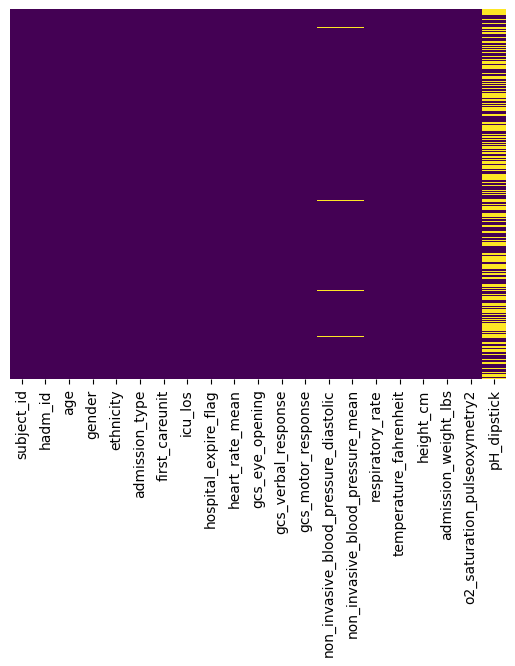

In [11]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap='viridis')

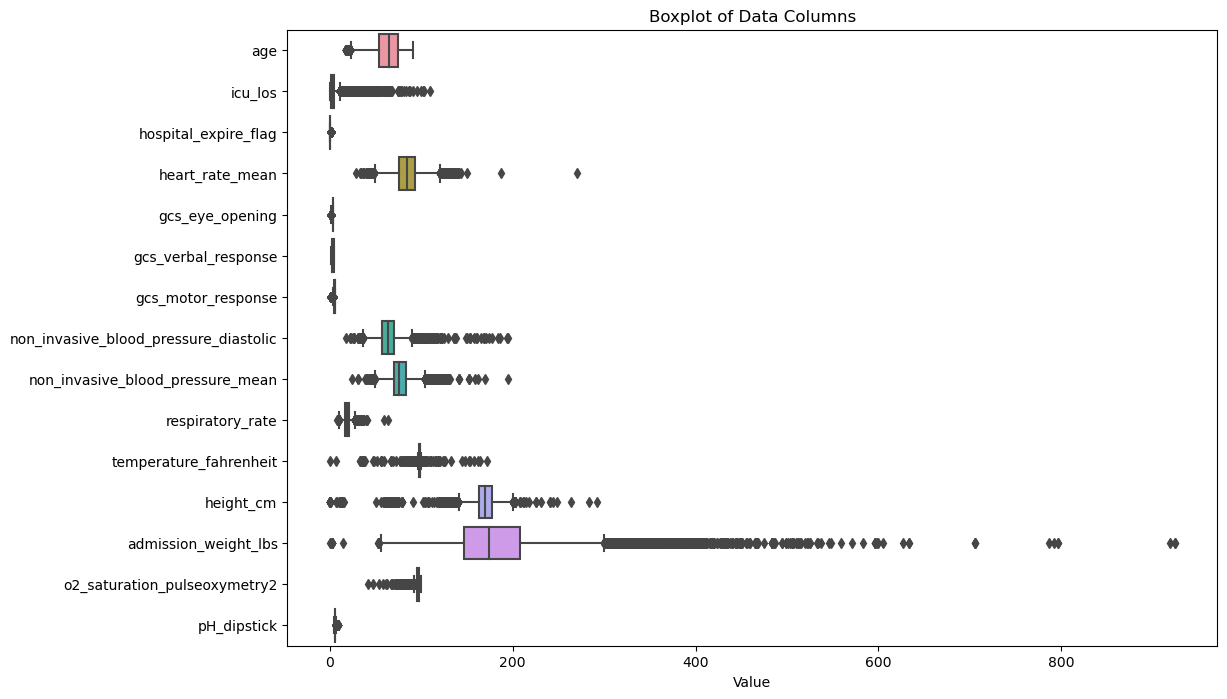

In [12]:
data_df = data.copy()
data_df.drop(['subject_id', 'hadm_id'], axis=1, inplace=True)  # Dropping columns inplace

# Set up the figure size
plt.figure(figsize=(12, 8))

# Box plot for each column in the DataFrame
sns.boxplot(data=data_df, orient='h')  # 'orient='h'' for horizontal orientation
plt.title('Boxplot of Data Columns')
plt.xlabel('Value')
plt.show()

In [16]:
# Calculate z-scores for each column
z_scores = np.abs((data_df - data_df.mean()) / data_df.std())

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify outliers by checking where z-score exceeds the threshold
outliers = z_scores > threshold

# Count outliers in each column
outliers_count = outliers.sum()
print(outliers_count)

admission_type                             0
admission_weight_lbs                     439
age                                        0
ethnicity                                  0
first_careunit                             0
gcs_eye_opening                          929
gcs_motor_response                       945
gcs_verbal_response                        0
gender                                     0
heart_rate_mean                          146
height_cm                                258
hospital_expire_flag                       0
icu_los                                  794
non_invasive_blood_pressure_diastolic    225
non_invasive_blood_pressure_mean         235
o2_saturation_pulseoxymetry2             302
pH_dipstick                              284
respiratory_rate                         251
temperature_fahrenheit                   135
dtype: int64


C:\Users\krishika.R\AppData\Local\Temp\ipykernel_29236\514097629.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((data_df - data_df.mean()) / data_df.std())
C:\Users\krishika.R\AppData\Local\Temp\ipykernel_29236\514097629.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((data_df - data_df.mean()) / data_df.std())


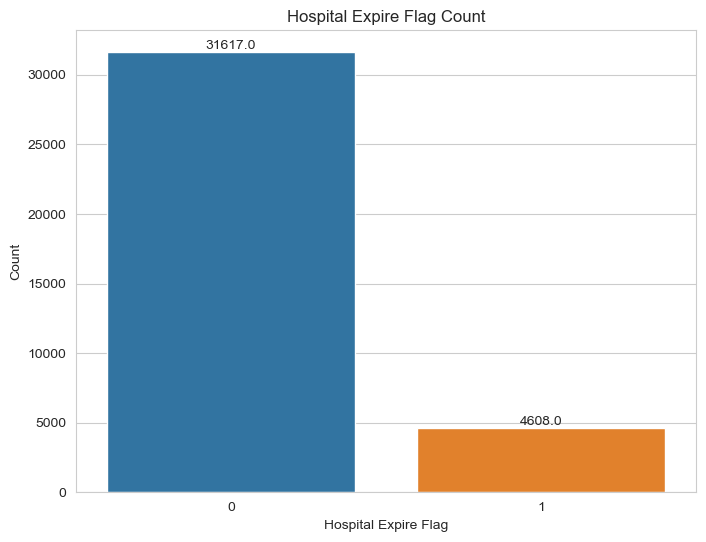

In [18]:
# Assuming 'data_df' is your DataFrame
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='hospital_expire_flag', data=data_df)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Hospital Expire Flag Count')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Count')
plt.show()

In [20]:
# chceking count of target variable
(31617/(31617+4608))*100

87.27950310559007

C:\Users\krishika.R\AppData\Local\Temp\ipykernel_29236\3308019622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()
C:\Users\krishika.R\AppData\Local\Temp\ipykernel_29236\3308019622.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


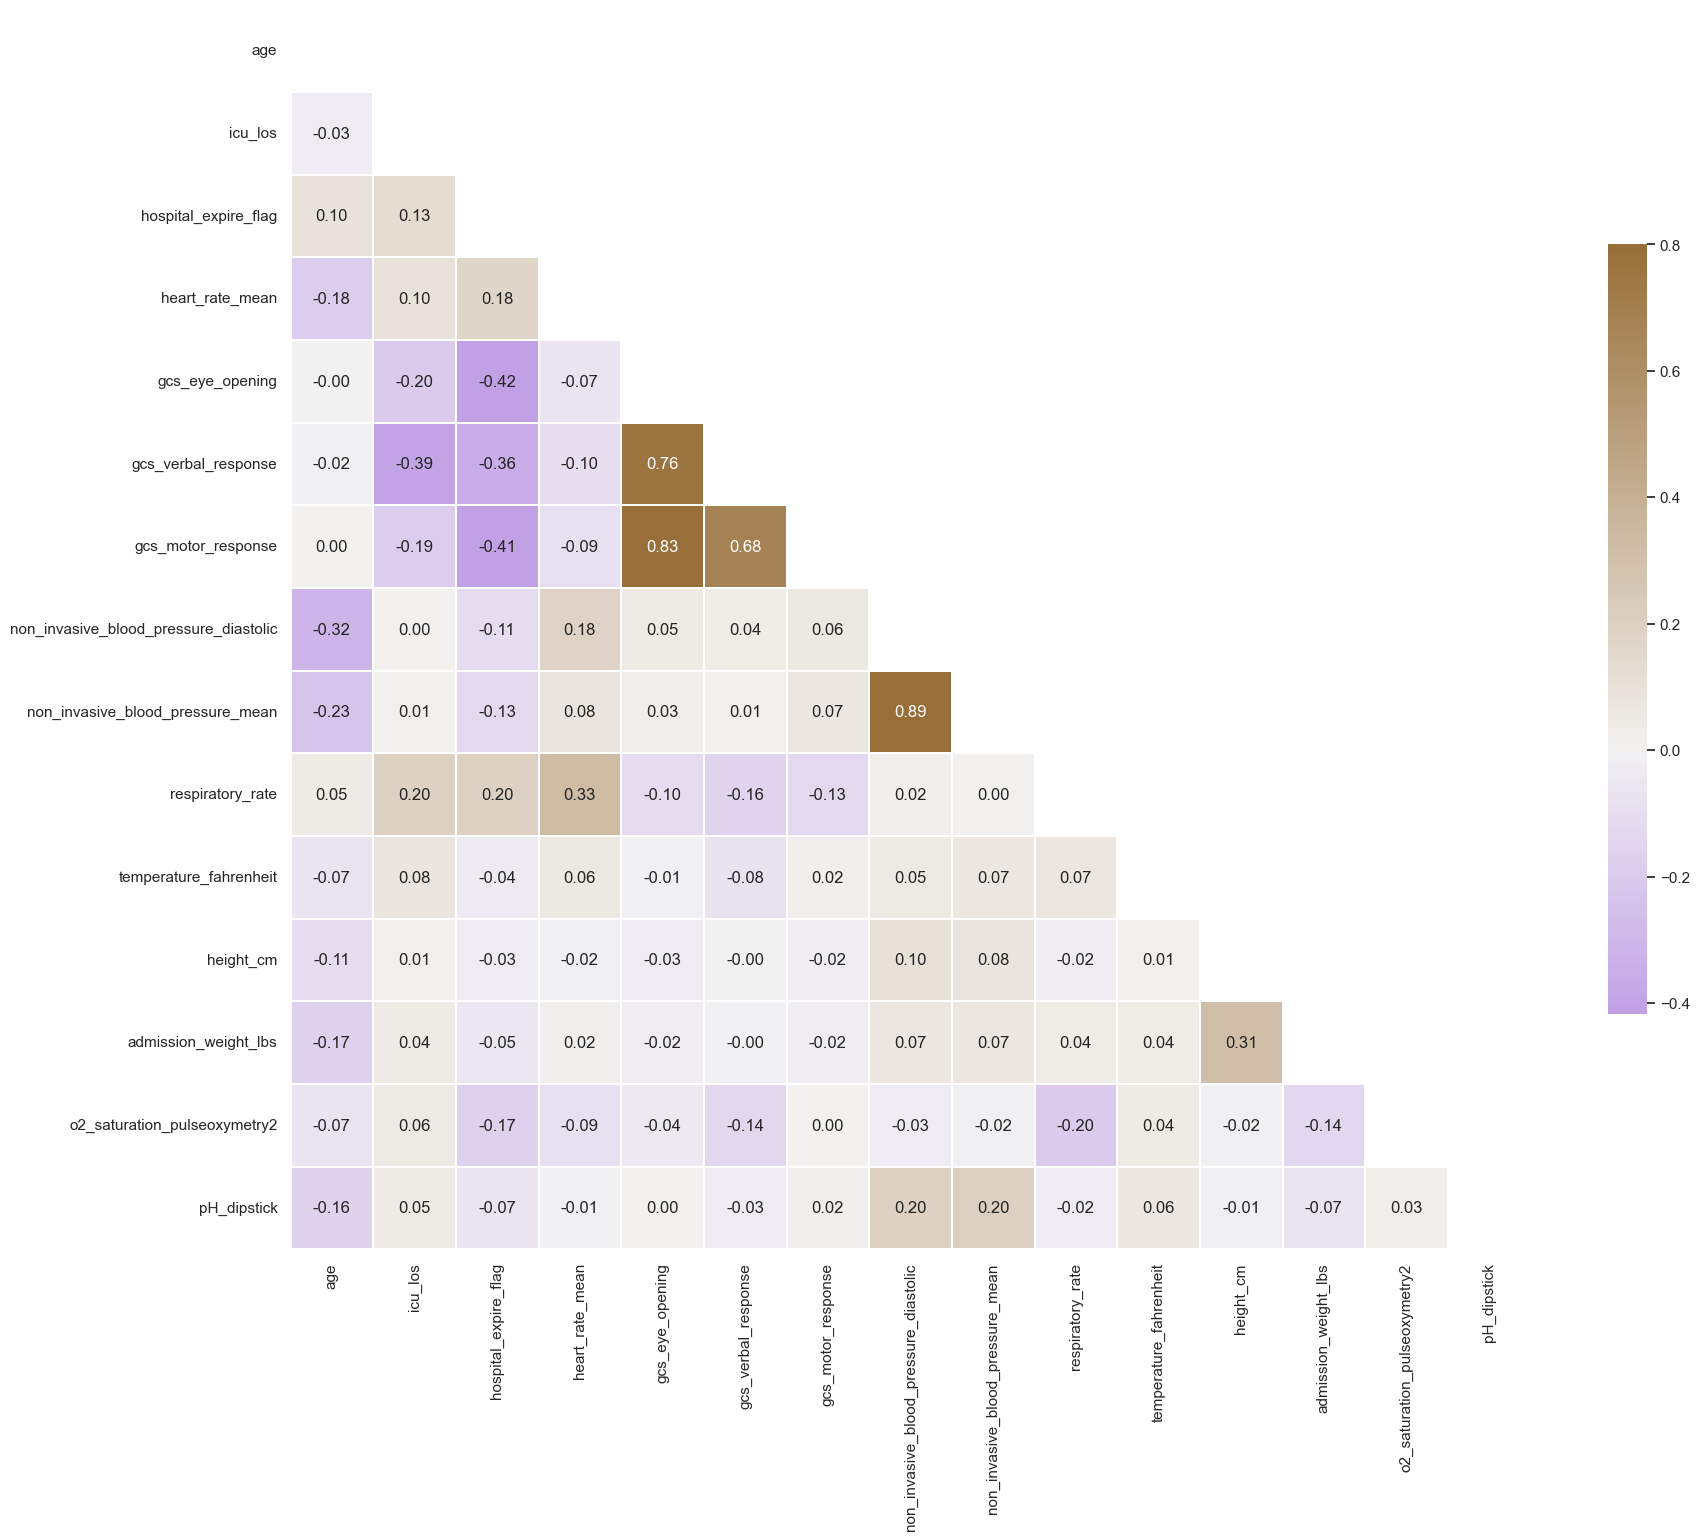

In [22]:
sns.set(style="white")
corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask,vmax =.8, cmap=cmap, center=0,fmt= '.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});